In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/MtWashingtonDailyTemps.csv")

In [3]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,Sunrise,Sunset
0,12/1/2014,3,36,20,65.1,700,1608
1,12/2/2014,1,22,12,34.7,702,1607
2,12/3/2014,8,32,20,53.0,703,1607
3,12/4/2014,-5,9,2,60.2,704,1607
4,12/5/2014,6,17,12,30.5,705,1607


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
DATE            1461 non-null object
MinTemp         1461 non-null int64
MaxTemp         1461 non-null int64
AvgTemp         1461 non-null int64
AvgWindSpeed    1461 non-null float64
Sunrise         1461 non-null int64
Sunset          1461 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 80.0+ KB


In [6]:
df.isnull().sum()

DATE            0
MinTemp         0
MaxTemp         0
AvgTemp         0
AvgWindSpeed    0
Sunrise         0
Sunset          0
dtype: int64

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [11]:
df.shape

(1461, 7)

In [15]:
df.set_index('DATE', inplace=True)

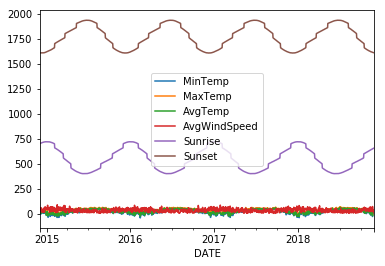

In [16]:
df.plot()

In [17]:
df.columns

Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed', 'Sunrise', 'Sunset'], dtype='object')

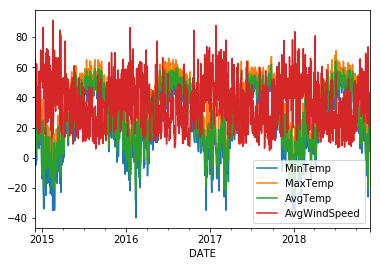

In [18]:
df[['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed']].plot()

In [19]:
def minute_maker(number):
    min_ = int(str(number)[-2:])
    hr_ = int(str(number)[:-2])
    return hr_*60 + min_

In [22]:
minute_maker(1705)

1025

In [23]:
df['sunrise_min'] = df['Sunrise'].apply(minute_maker)
df['sunset_min'] = df['Sunset'].apply(minute_maker)

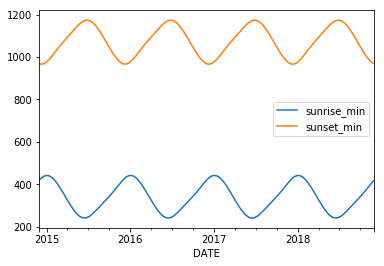

In [25]:
df[['sunrise_min', 'sunset_min']].plot()

In [27]:
df_new = df[['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed', 'sunrise_min', 'sunset_min']].copy()

In [28]:
df_new.head()

,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,sunrise_min,sunset_min
DATE,,,,,,
2014-12-01,3,36,20,65.1,420,968
2014-12-02,1,22,12,34.7,422,967
2014-12-03,8,32,20,53.0,423,967
2014-12-04,-5,9,2,60.2,424,967
2014-12-05,6,17,12,30.5,425,967


In [31]:
df_new.index.freq = 'D'

In [32]:
df_new.index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10',
               ...
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='DATE', length=1461, freq='D')

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_new[['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed', 'sunrise_min', 'sunset_min']])

C:\Users\niava\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\niava\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


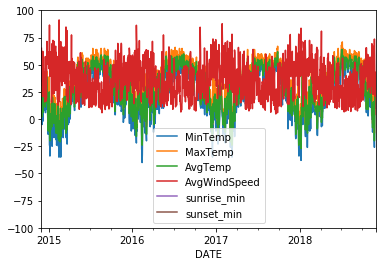

In [49]:
df_new.plot(ylim=[-100,100])

(array([ 14.,  27.,  82., 115., 201., 238., 175., 262., 293.,  54.]),
 array([-2.98237152, -2.50054598, -2.01872043, -1.53689488, -1.05506933,
        -0.57324378, -0.09141824,  0.39040731,  0.87223286,  1.35405841,
         1.83588396]),
 <a list of 10 Patch objects>)

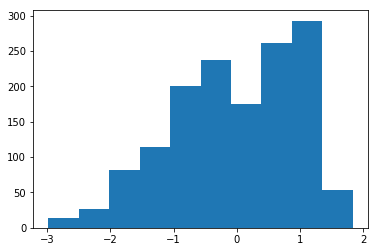

In [50]:
plt.hist(X[:, 0])

In [72]:
from sklearn.ensemble import IsolationForest

model_isf = IsolationForest(behaviour='new', contamination=0.1,
                                         random_state=42)

In [73]:
y_pred = model_isf.fit(X).predict(X)

In [74]:
y_pred.max()

1

In [75]:
df_new['tag'] = y_pred

In [76]:
df_new.head()

,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,sunrise_min,sunset_min,tag
DATE,,,,,,,
2014-12-01,3,36,20,65.1,420,968,1
2014-12-02,1,22,12,34.7,422,967,1
2014-12-03,8,32,20,53.0,423,967,1
2014-12-04,-5,9,2,60.2,424,967,1
2014-12-05,6,17,12,30.5,425,967,1


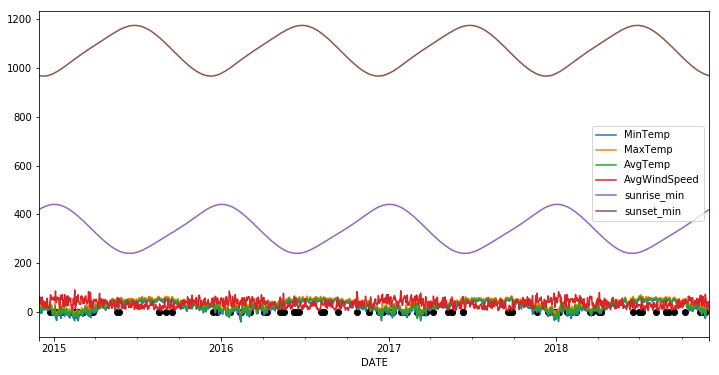

In [78]:
outlier = df_new[df_new['tag'] == -1]
df_new[['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed', 'sunrise_min', 'sunset_min']].plot(figsize=(12,6))
plt.scatter(outlier.index, outlier['tag'], color='black')

In [79]:
model_isf.decision_function(X)

array([0.02703899, 0.06702699, 0.06421643, ..., 0.06730524, 0.07506744,
       0.01672924])

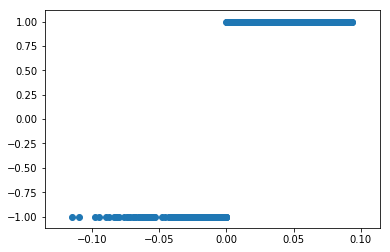

In [80]:
plt.scatter(model_isf.decision_function(X), y_pred)

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca_model = PCA(2)

In [84]:
X_prime = pca_model.fit_transform(X)

In [85]:
X_prime

array([[ 2.18038704, -0.29622652],
       [ 2.2271082 , -0.97358603],
       [ 1.97930096, -0.70407235],
       ...,
       [ 1.97437433, -1.14224729],
       [ 1.96554764, -0.92351988],
       [ 0.99858654, -2.20389312]])

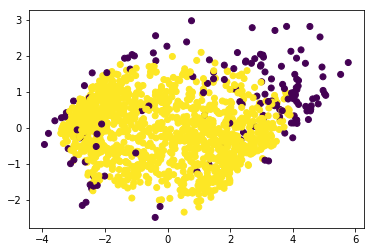

In [87]:
plt.scatter(X_prime[:, 0], X_prime[:, 1], c=y_pred)

In [90]:
pca_model.

6

In [91]:
df_new.columns

Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed', 'sunrise_min',
       'sunset_min', 'tag'],
      dtype='object')

In [97]:
map_feature=['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgWindSpeed', 'sunrise_min', 'sunset_min']

def print_ith_weight_feature(feature_i,pca,map_feature):
    feature_i=feature_i-1 
    list_eigenvec0_unsorted=pca.components_[feature_i]
    list_eigenvec0_sorted_index_r = np.argsort(list_eigenvec0_unsorted)
    list_eigenvec0_sorted_index=np.array(list_eigenvec0_sorted_index_r[::-1])
    for index_ in list_eigenvec0_sorted_index:
        print(map_feature[index_],'   ',round(list_eigenvec0_unsorted[index_],2))
        
print_ith_weight_feature(1, pca_model, map_feature)   
print()
print_ith_weight_feature(2, pca_model, map_feature)   

sunrise_min     0.41
AvgWindSpeed     0.29
sunset_min     -0.39
MaxTemp     -0.44
MinTemp     -0.45
AvgTemp     -0.45

sunset_min     0.59
AvgWindSpeed     0.5
MaxTemp     -0.21
AvgTemp     -0.22
MinTemp     -0.22
sunrise_min     -0.5
